In [1]:

import numpy as np
import cvxpy as cp
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

## health care value no short

In [2]:
data=pd.read_csv('C:/Users/herry/Desktop/optimization final graph/healthcare_value_noshort.csv',delimiter=';')
data

,SDp,ERp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.009116,0.00,0.0686,0.3545,0.1380,0.1491,0.0187,0.1639,0.0180,0.0038,0.0786,0.0067
2,0.009083,0.01,0.0724,0.3610,0.1332,0.1396,0.0161,0.1575,0.0140,0.0113,0.0840,0.0109
3,0.009063,0.02,0.0759,0.3666,0.1285,0.1301,0.0137,0.1499,0.0102,0.0213,0.0890,0.0150
4,0.009054,0.03,0.0793,0.3720,0.1236,0.1204,0.0112,0.1421,0.0066,0.0317,0.0940,0.0191
5,0.009058,0.04,0.0828,0.3775,0.1189,0.1108,0.0088,0.1344,0.0028,0.0419,0.0989,0.0231
6,0.009074,0.05,0.0863,0.3828,0.1131,0.1005,0.0058,0.1267,0.0007,0.0527,0.1040,0.0272
7,0.009102,0.06,0.0899,0.3881,0.1064,0.0893,0.0026,0.1189,0.0002,0.0641,0.1092,0.0313
8,0.009144,0.07,0.0934,0.3934,0.0989,0.0772,0.0006,0.1101,0.0001,0.0767,0.1142,0.0354
9,0.009202,0.08,0.0966,0.3989,0.0906,0.0644,0.0001,0.1001,0.0000,0.0906,0.1191,0.0396


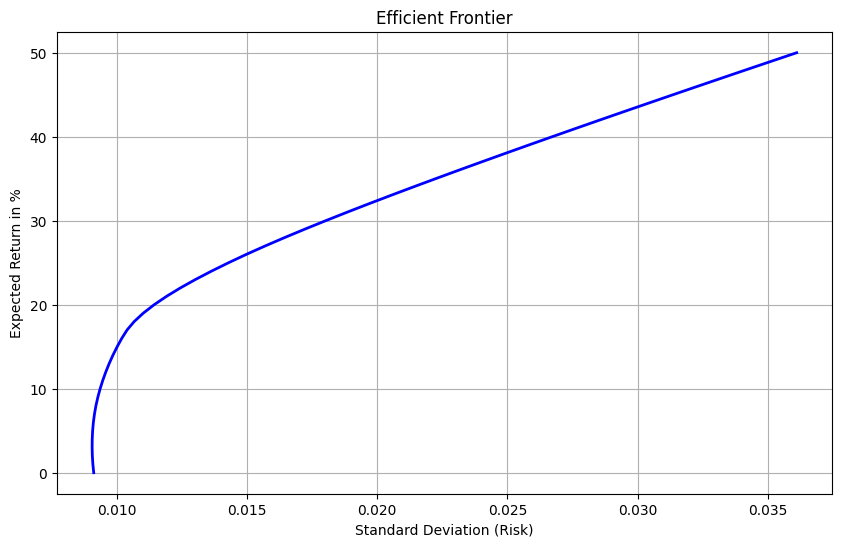

In [3]:
# Plotting the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(data['SDp'], data['ERp']*100, 'b-', linewidth=2)
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return in %')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()


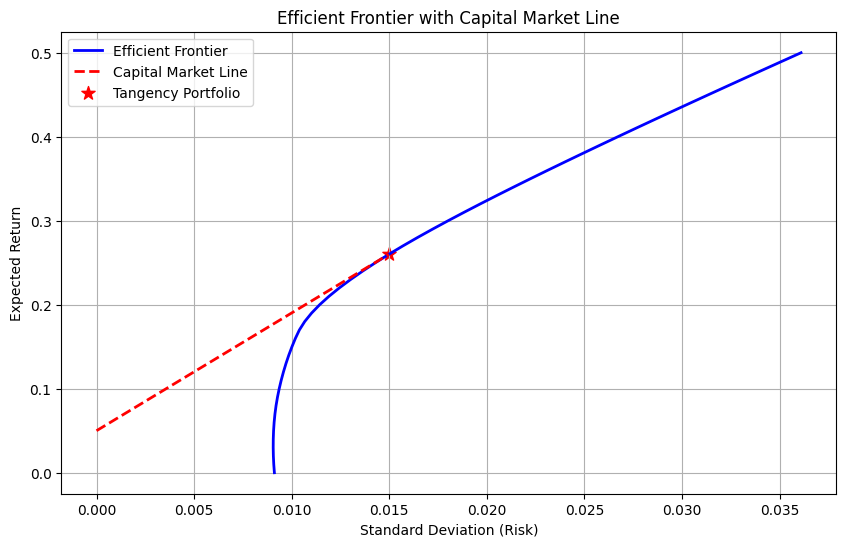

In [4]:
# Assuming 'risk_free_rate' is defined as the risk-free rate
risk_free_rate = 0.05

# Calculate the Sharpe ratio for each portfolio on the efficient frontier
data['SharpeRatio'] = (data['ERp'] - risk_free_rate) / (data['SDp'])

# Find the portfolio with the highest Sharpe ratio (tangency portfolio)
tangency_portfolio = data.loc[data['SharpeRatio'].idxmax()]

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(data['SDp'], data['ERp'], 'b-', linewidth=2, label='Efficient Frontier')

# Plot the Capital Market Line (CML)
cml_x = [0, tangency_portfolio['SDp']]
cml_y = [risk_free_rate, tangency_portfolio['ERp']]
plt.plot(cml_x, cml_y, 'r--', linewidth=2, label='Capital Market Line')

# Mark the tangency portfolio
plt.scatter(tangency_portfolio['SDp'], tangency_portfolio['ERp'], color='red', marker='*', s=100, label='Tangency Portfolio')

plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier with Capital Market Line')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
tangency_portfolio 

SDp             0.014979
ERp             0.260000
x1              0.000300
x2              0.424600
x3              0.000000
x4              0.000000
x5              0.000000
x6              0.000000
x7              0.000000
x8              0.175200
x9              0.097400
x10             0.302500
SharpeRatio    14.019200
Name: 27, dtype: float64

## Consumption growth short


In [6]:
data_short=pd.read_csv('C:/Users/herry/Desktop/optimization final graph/healthcare_value_short.csv',delimiter=';')
data_short

,SDp,ERp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.009116,0.00,0.0689,0.3558,0.1379,0.1492,0.0185,0.1655,0.0178,0.0005,0.0791,0.0068
2,0.009083,0.01,0.0724,0.3612,0.1332,0.1397,0.0161,0.1577,0.0139,0.0108,0.0841,0.0109
3,0.009063,0.02,0.0759,0.3667,0.1285,0.1301,0.0137,0.1499,0.0101,0.0211,0.0890,0.0150
4,0.009054,0.03,0.0793,0.3721,0.1239,0.1206,0.0113,0.1422,0.0062,0.0314,0.0940,0.0190
...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.025583,0.76,0.3320,0.7698,-0.2180,-0.5754,-0.1632,-0.4256,-0.2748,0.7838,0.4553,0.3162
78,0.025891,0.77,0.3354,0.7753,-0.2227,-0.5850,-0.1656,-0.4334,-0.2787,0.7941,0.4602,0.3202
79,0.026199,0.78,0.3389,0.7807,-0.2274,-0.5945,-0.1680,-0.4412,-0.2825,0.8045,0.4652,0.3243
80,0.026508,0.79,0.3424,0.7862,-0.2321,-0.6040,-0.1704,-0.4489,-0.2864,0.8148,0.4701,0.3284


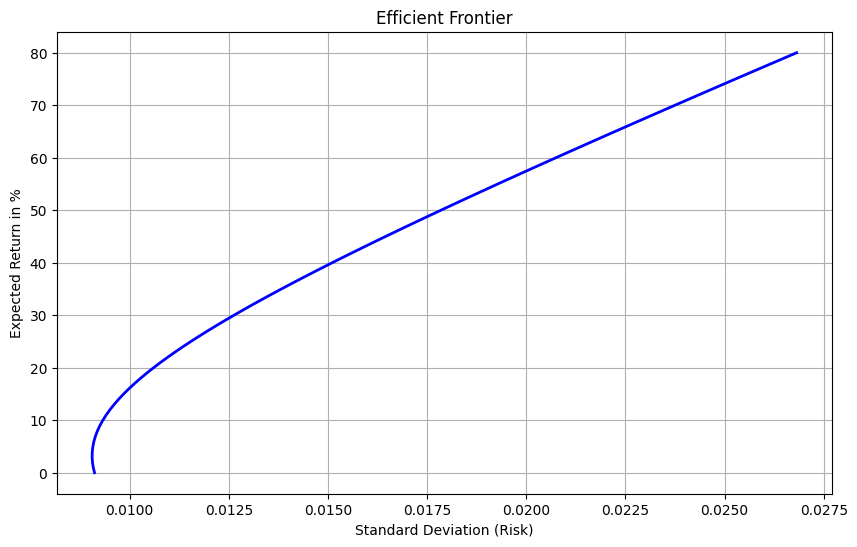

In [7]:
# Plotting the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(data_short['SDp'], data_short['ERp']*100, 'b-', linewidth=2)
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return in %')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()


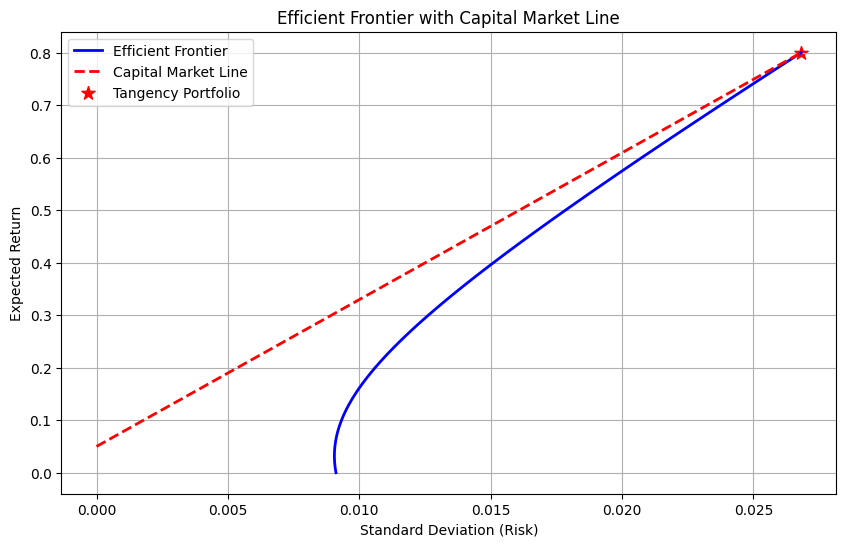

In [8]:
# Assuming 'risk_free_rate' is defined as the risk-free rate
risk_free_rate = 0.05

# Calculate the Sharpe ratio for each portfolio on the efficient frontier
data_short['SharpeRatio'] = (data_short['ERp'] - risk_free_rate) / (data_short['SDp'])

# Find the portfolio with the highest Sharpe ratio (tangency portfolio)
tangency_portfolio = data_short.loc[data_short['SharpeRatio'].idxmax()]

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(data_short['SDp'], data_short['ERp'], 'b-', linewidth=2, label='Efficient Frontier')

# Plot the Capital Market Line (CML)
cml_x = [0, tangency_portfolio['SDp']]
cml_y = [risk_free_rate, tangency_portfolio['ERp']]
plt.plot(cml_x, cml_y, 'r--', linewidth=2, label='Capital Market Line')

# Mark the tangency portfolio
plt.scatter(tangency_portfolio['SDp'], tangency_portfolio['ERp'], color='red', marker='*', s=100, label='Tangency Portfolio')

plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier with Capital Market Line')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
tangency_portfolio

SDp             0.026817
ERp             0.800000
x1              0.345800
x2              0.791600
x3             -0.236800
x4             -0.613600
x5             -0.172800
x6             -0.456700
x7             -0.290200
x8              0.825100
x9              0.475100
x10             0.332400
SharpeRatio    27.967553
Name: 81, dtype: float64

In [10]:
data_short

,SDp,ERp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,SharpeRatio
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.009116,0.00,0.0689,0.3558,0.1379,0.1492,0.0185,0.1655,0.0178,0.0005,0.0791,0.0068,-5.485160
2,0.009083,0.01,0.0724,0.3612,0.1332,0.1397,0.0161,0.1577,0.0139,0.0108,0.0841,0.0109,-4.403682
3,0.009063,0.02,0.0759,0.3667,0.1285,0.1301,0.0137,0.1499,0.0101,0.0211,0.0890,0.0150,-3.310189
4,0.009054,0.03,0.0793,0.3721,0.1239,0.1206,0.0113,0.1422,0.0062,0.0314,0.0940,0.0190,-2.208860
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.025583,0.76,0.3320,0.7698,-0.2180,-0.5754,-0.1632,-0.4256,-0.2748,0.7838,0.4553,0.3162,27.752837
78,0.025891,0.77,0.3354,0.7753,-0.2227,-0.5850,-0.1656,-0.4334,-0.2787,0.7941,0.4602,0.3202,27.809238
79,0.026199,0.78,0.3389,0.7807,-0.2274,-0.5945,-0.1680,-0.4412,-0.2825,0.8045,0.4652,0.3243,27.863771
80,0.026508,0.79,0.3424,0.7862,-0.2321,-0.6040,-0.1704,-0.4489,-0.2864,0.8148,0.4701,0.3284,27.916518
